<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/semana7/actividad6_visuzalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Rodrigo Ildefonso Roman Guzman|A01794225|María de la Paz Rico Fernández|Semana 7 | (Noviembre 1 2022)</h1>

<h2>Actividad Semanal -- 6, Visualización</h2>

<h2>1) Cargar los datos</h2>

In [23]:
#Example of linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Download the data set
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(path)

print('Importamos los datos')
print('----------------------')
print(df.head())

Importamos los datos
----------------------
   ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15      X16  \
0   1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0      0.0   
1   2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   3455.0   
2   3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0  14948.0   
3   4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0  28959.0   
4   5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0  19146.0   

       X17     X18      X19      X20     X21     X22     X23    Y  
0      0.0     0.0    689.0      0.0     0.0     0.0     0.0  1.0  
1   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0  1.0  
2  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0  0.0  
3  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0  0.0  
4  19131.0  2000.0  36681.0  10000.0  9000.0   689.0   679.0  0.0  

[5 rows x 25 columns]


<h2>Obtenemos informacion del dataframe</h2>

In [36]:
print('Forma: ',df.shape)
print('Tenemos',df.shape[0],'muestras y ',df.shape[1],'variables')
print('----------------------')
print('Columnas o nombres de las variables: ',df.columns)
print('----------------------')
print('Los tipos de datos con los que estamos lidiando', df.dtypes)
print('----------------------')
print('Mas informacion sobre los datos')
print(df.info())
print('----------------------')
print('Revisamos los datos nulos')
print(df.isna().sum())
print('----------------------')
print('Por ultimo imprimimos las primeras 5 hileras')
print(df.head())



Forma:  (30000, 25)
Tenemos 30000 muestras y  25 variables
----------------------
Columnas o nombres de las variables:  Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')
----------------------
Los tipos de datos con los que estamos lidiando ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object
----------------------
Mas informacion sobre los datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------ 

<h3>3) Limpia los datos</h3>

In [37]:
#Removemos los registros nulos
df.dropna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


<h3>4) Calcula la estadistica descriptiva</h3>

In [38]:
#Estadistica descriptiva
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [41]:
#Dispersion y tendencia central (explicadas)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
X1,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
X2,29999.0,1.603753,0.489125,1.0,1.00,2.0,2.00,2.0
X3,29998.0,1.853057,0.790320,0.0,1.00,2.0,2.00,6.0
X4,29998.0,1.551903,0.521968,0.0,1.00,2.0,2.00,3.0
X5,29995.0,35.484214,9.218024,21.0,28.00,34.0,41.00,79.0
X6,29997.0,-0.016635,1.123829,-2.0,-1.00,0.0,0.00,8.0
X7,29995.0,-0.133689,1.197254,-2.0,-1.00,0.0,0.00,8.0
X8,29993.0,-0.166405,1.196048,-2.0,-1.00,0.0,0.00,8.0
X9,29991.0,-0.220800,1.169153,-2.0,-1.00,0.0,0.00,8.0


<h2>5) Realiza el conteo de las variables categoricas</h2>

In [61]:

#Separamos las variables categoricas y dejamos afuera la variable y (obejtivo)
nonCategorical = [df.iloc[:,1:2].copy(),df.iloc[:,12:-1].copy()]

filledDataset = pd.concat(nonCategorical,axis =1, sort=False)

#Como tenemos suficientes datos podemos deshacernos de las filas que tienen elementos vacios
filledDataset.dropna(axis = 0,inplace = True)


#Necesitamos no tomar en cuenta el ID ni la columna de resultados
print('Las variables categoricas')
print(df.columns[2:12])
print('\n')
print('Total de variables categoricas: ',len(df.columns[2:12]))

Las variables categoricas
Index(['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], dtype='object')


Total de variables categoricas:  10


<h2>6) Escala los datos, si consideras necesario</h2>
<p>Si considero necesario escalar los valores dado que pertenecen a diversos rangos y esta diferencia puede afectar el model que generemos.</p>

In [62]:
#Usamos el escalador de sklearn para normalizar los datos
from sklearn.preprocessing import StandardScaler

#Tomamos en cuenta solamente datos no categoricos
#Escalar los datos con standarizacion
sc = StandardScaler()
scaledData = sc.fit_transform(filledDataset)
print('Datos escalados')
print('-------------------')
print(scaledData)


Datos escalados
-------------------
[[-1.13719434 -0.64261158 -0.64751552 ... -0.30811431 -0.31416916
  -0.29348098]
 [-0.36642863 -0.6593238  -0.66685637 ... -0.24430701 -0.31416916
  -0.1810226 ]
 [-0.59765834 -0.29878235 -0.49406686 ... -0.24430701 -0.24874092
  -0.01233502]
 ...
 [-1.06011777 -0.64733607 -0.64394792 ... -0.04012367 -0.18331268
  -0.11917049]
 [-0.67473492 -0.71806774  0.40979841 ... -0.18522146  3.15117221
  -0.19204352]
 [-0.90596463 -0.04504436 -0.0041829  ... -0.24430701 -0.24874092
  -0.23725179]]


<h2>7) Reduce las dimensiones con PCA</h2>
<ul>
<li>Indica la varianza</li>
<li>Indica la importancia de las variables</li>
</ul>

In [63]:
from sklearn.decomposition import PCA
#Calculamos los componentes principales de los datos 
pca = PCA()
pca.fit(scaledData)
pcaData = pca.transform(scaledData)

#Creamos un diccionario con los valores promedio de varianza y la varianza acumulada de los componentes principales
dictionaryVariance = {
    'Porcentaje de varianza':np.round(pca.explained_variance_ratio_,3)*100,
    'Porcentaje acumulado de varianza':np.cumsum(pca.explained_variance_ratio_)*100
    }

#Creamos las etiquetas para los componentes principales
labels = [f'PC{i+1}'for i in range(len(filledDataset.columns))]
frameVariance = pd.DataFrame(dictionaryVariance)
frameVariance.index = labels
print(frameVariance)
print('\n')
print('--------Cantidad de varianza por componente-------------')
varPCA = pd.DataFrame(pca.explained_variance_)
varPCA.index = labels
print(varPCA)

      Porcentaje de varianza  Porcentaje acumulado de varianza
PC1                     45.5                         45.490116
PC2                     13.2                         58.663141
PC3                      7.2                         65.909112
PC4                      6.8                         72.708324
PC5                      6.7                         79.427722
PC6                      6.0                         85.445173
PC7                      5.7                         91.142604
PC8                      5.6                         96.729579
PC9                      2.0                         98.764139
PC10                     0.5                         99.310418
PC11                     0.3                         99.626285
PC12                     0.2                         99.821212
PC13                     0.2                        100.000000


--------Cantidad de varianza por componente-------------
             0
PC1   5.913912
PC2   1.712550
PC3   0.942008

<h2>Histograma de atributos para vizualizar distribucion</h2>

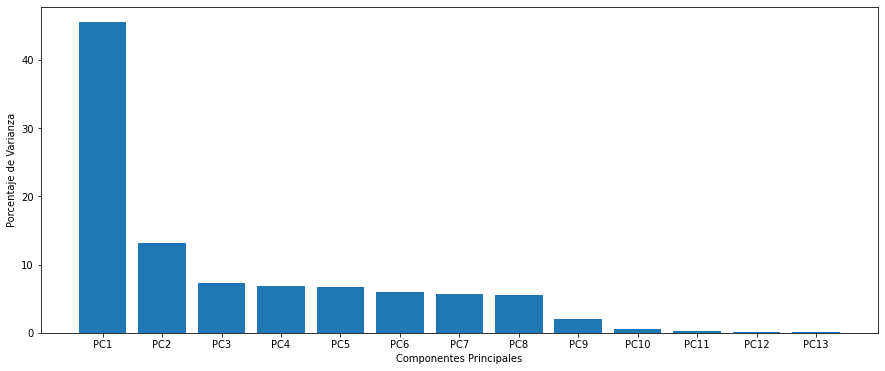

In [64]:
pcaVariations = np.round(pca.explained_variance_ratio_ *100,decimals = 2)
#Generamos etiquetas para realizar una visualizacion de nuestros componentes principales
labels = ['PC'+str(x) for x in range(1,len(pcaVariations)+1)]
plt.figure(figsize=(15, 6))


plt.bar(x=range(1,len(pcaVariations)+1),height = pcaVariations,tick_label = labels)
plt.ylabel('Porcentaje de Varianza')
plt.xlabel('Componentes Principales')
plt.show()